# Import Kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"khaledabdallah","key":"676e156a60f3f033c3f9c6630b671551"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# House dataset

In [5]:
! kaggle datasets download -d shibumohapatra/house-price

house-price.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip house-price.zip

Archive:  house-price.zip
replace 1553768847-housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 1553768847-housing.csv  


# Data Loading / Preprocessing

In [7]:
import pandas as pd
df=pd.read_csv('1553768847-housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
#Getting unique values on the data
for col in df.columns:
    print(f"{col} - {df[col].nunique()}")

longitude - 844
latitude - 862
housing_median_age - 52
total_rooms - 5926
total_bedrooms - 1923
population - 3888
households - 1815
median_income - 12928
ocean_proximity - 5
median_house_value - 3842


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [12]:
df['total_bedrooms'].mean(), df['total_bedrooms'].median(), df['total_bedrooms'].mode()

(537.8705525375618,
 435.0,
 0    280.0
 Name: total_bedrooms, dtype: float64)

In [13]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [14]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Create a data frame corr_df by dropping the columns latitude, longitude, and ocean_proximity using the pandas.DataFrame.drop() function. Use the Pearson correlation to find the correlation of each remaining feature in the corr_df with the target variable median_house_value using the function pandas.DataFrame.corrwith().**

In [15]:
df_filltered = df.drop(columns=['latitude','longitude','ocean_proximity'])
corr_df = df_filltered.corrwith(df_filltered['median_house_value'],method='pearson')
corr_df

housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049457
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
dtype: float64

In [16]:
y = df['median_house_value']
X = df.drop(columns=['median_house_value'])
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


**Data Visualization**


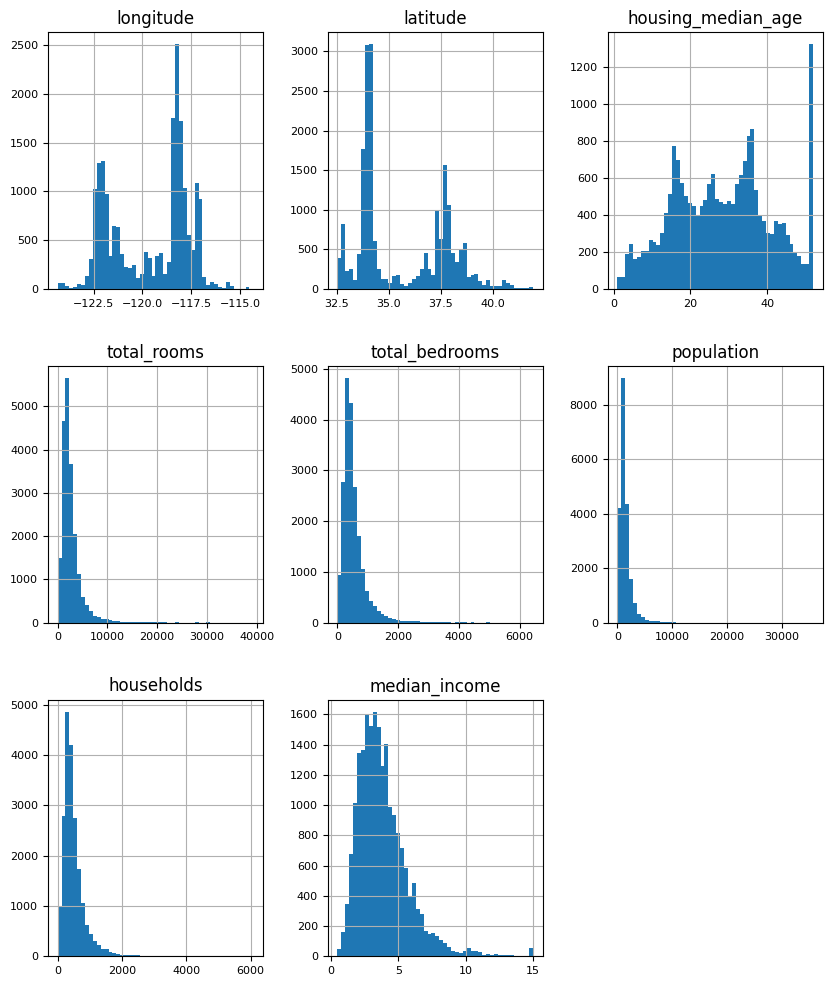

In [17]:
ax = X.hist(figsize=(10, 12), bins=50, xlabelsize=8, ylabelsize=8)

**Use pandas.get_dummies to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity**

In [18]:
X['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [19]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
dummies = pd.get_dummies(X.ocean_proximity, dtype=float)

In [21]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [22]:
dummies.tail()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0
20639,0.0,1.0,0.0,0.0,0.0


In [23]:
X = X.drop(columns=['ocean_proximity'], axis=1)
X = pd.concat([X, dummies], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0.0,0.0,0.0,1.0,0.0


# Data Splitting


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14448, 13) (6192, 13) (14448,) (6192,)


# Data Scaling

In [25]:

x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [26]:
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1,1))

In [27]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(np.array(y_test).reshape(-1,1))

# Modelling

In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
y_preds = reg.predict(X_test)

In [30]:
y_preds = y_scaler.inverse_transform(y_preds)
y_test = y_scaler.inverse_transform(y_test)
print(y_preds,y_test)

[[ 54560.13658604]
 [122939.97819302]
 [252588.01547948]
 ...
 [283840.43397151]
 [113960.4061616 ]
 [219047.40125172]] [[ 47700.]
 [ 45800.]
 [500001.]
 ...
 [218400.]
 [119400.]
 [209800.]]


**Perform PCA on the features (X_train) and set n_component as 2**

In [31]:
pca = PCA(n_components=2)
pca.fit_transform(X_train)

array([[-0.29644872, -1.72833798],
       [ 0.02550006, -1.44972753],
       [-1.02683188, -0.3799171 ],
       ...,
       [ 0.14180435, -1.49220088],
       [ 0.67479061,  0.36469457],
       [ 1.80126199,  2.84179444]])

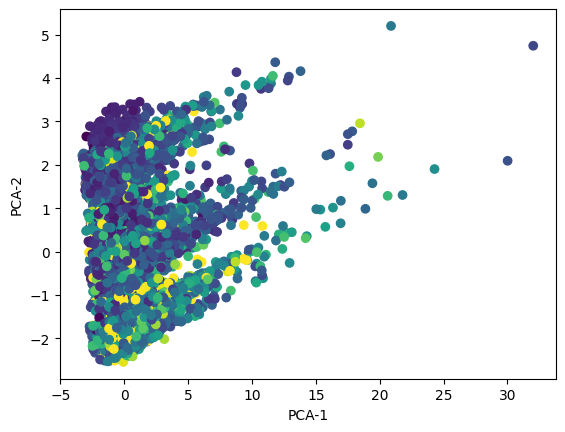

In [32]:
Xt = pca.fit_transform(X_train)
plot = plt.scatter( Xt[:,0], Xt[:,1], c=y_train)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()

**Calculate the total percentage of variance captured by the 2 PCA components using pca.explained_variance_ratio_**

In [33]:
print("Percentage of variance captured: ",pca.explained_variance_ratio_*100)

Percentage of variance captured:  [30.12491629 19.77413669]


**Evaluation**

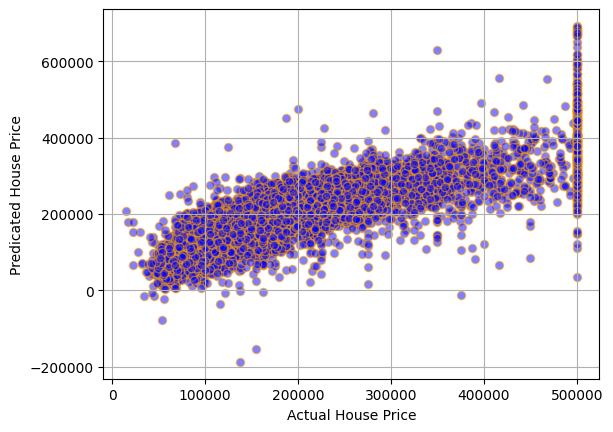

In [34]:
plt.scatter(y_test, y_preds, edgecolor='orange', alpha=0.5, color='blue')
plt.xlabel("Actual House Price")
plt.ylabel("Predicated House Price")
plt.grid()

In [35]:
mape = mean_absolute_percentage_error(y_test, y_preds)
rmse = mean_squared_error(y_test, y_preds, squared=False)
r2 = r2_score(y_test, y_preds)

print(f"MAPE : {mape}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

MAPE : 0.2895155229738038
RMSE : 68800.64878395082
R2 : 0.6393611711434394
